In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.tsa.stattools import acf

Vil generere autoregressiv tidserie

In [2]:
def ar(p1, T):
    
    y = np.empty(T)
    y[0] = np.random.randn(1)
    
    for t in range(1,T):
        y[t] = p1*y[t-1]+np.random.randn(1)
    return y
    

In [3]:
def ma(q1,T):
    y = np.empty(T)
    ϵ = np.random.randn(T)
    y[0] = ϵ[0]
    for t in range(1, T):
        y[t] = q1*ϵ[t-1]+ϵ[t]
    
    return y

In [4]:
T = 100
y = ar(0.5,T=T)
kde = stats.gaussian_kde(y)

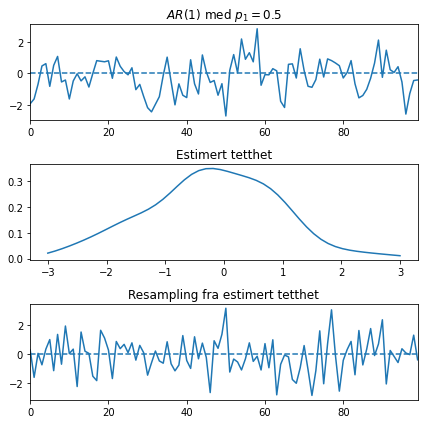

In [5]:
fig, axes = plt.subplots(3,1, figsize=(6,6))
axes = axes.flatten()
grid = np.linspace(-3,3)

axes[0].plot(y)
axes[0].hlines(0,0,T, linestyle='dashed')
axes[0].title.set_text('$AR(1)$ med $p_1=0.5$')
axes[0].set(xlim=(0,T-1))

axes[1].plot(grid, kde.pdf(grid))
axes[1].title.set_text('Estimert tetthet')

axes[2].plot(kde.resample(T).flatten())
axes[2].hlines(0,0,T, linestyle='dashed')
axes[2].title.set_text('Resampling fra estimert tetthet')
axes[2].set(xlim=(0,T-1))

plt.tight_layout()
fig.savefig('avhengighet_vs_iid.pdf')

C:\Users\dessv\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:669: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


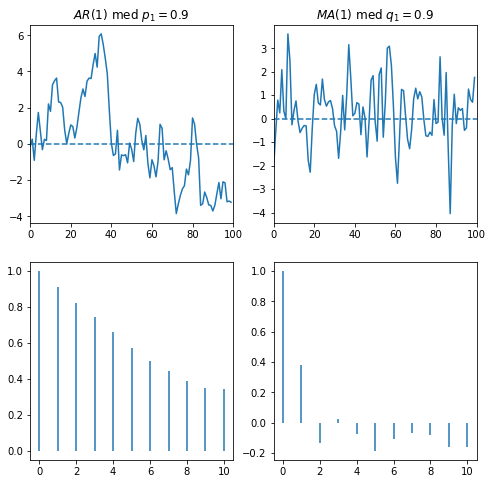

In [6]:
fig, axes = plt.subplots(2,2,figsize=(8,8))
axes = axes.flatten()

y_ar = ar(0.9,T)
y_ma = ma(0.9,T)
axes[0].plot(y_ar)
axes[0].title.set_text('$AR(1)$ med $p_1=0.9$')

axes[1].plot(y_ma)
axes[1].title.set_text('$MA(1)$ med $q_1=0.9$')

axes[2].vlines(range(11), [0]*11, acf(y_ar, nlags=10))
axes[3].vlines(range(11), [0]*11, acf(y_ma, nlags=10))

for ax in axes[:2]:
    ax.hlines(0,0,T, linestyle='dashed')
    ax.set(xlim=(0,T))
    